In [1]:
import numpy as np
from sklearn.decomposition import FastICA, PCA
import cv2
import matplotlib.pyplot as plt
import MovieAnalysisFunctions as MA
import mne
from math import *
#specify the path to the sample where {} has to be filled in by the function afterwards.
#SAMPLE_PATH = '../res/Movies/Generated_Neuron_Samples/NotOverlapping/128x128/NoiseFree/movie_sample_128x128_01.avi'
#RECONSTRUCTED_SAMPLE_PATH = '../res/Movies/Reconstructed_Samples/ICA/NotOverlapping/128x128/NoiseFree/reconstructed_video_128x128_01.avi'

In [2]:
A_true = np.loadtxt('A_true_s.txt')
D_true = np.loadtxt('D_true_s.txt')
X_true = np.loadtxt('X_true_s.txt')

In [3]:
X = X_true
X = X -np.mean(X)
X = np.transpose(X) 

nr_components = 3

ica = FastICA(n_components=nr_components, max_iter= 100000000000000, tol = 0.000000000000001)
S = ica.fit_transform(X)
A = ica.mixing_

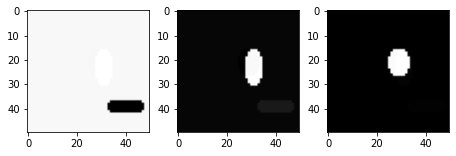

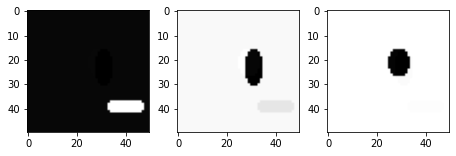

In [6]:
fig1 = plt.figure(figsize = (13,13))
fig2 = plt.figure(figsize = (13,13))

for i in range(nr_components):
    ax1 = fig1.add_subplot(5,5,i+1)
    ax1.imshow(A[:,i].reshape(50,50), cmap = 'gray')
    ax2 = fig2.add_subplot(5,5,i+1)
    ax2.imshow(-A[:,i].reshape(50,50), cmap = 'gray')

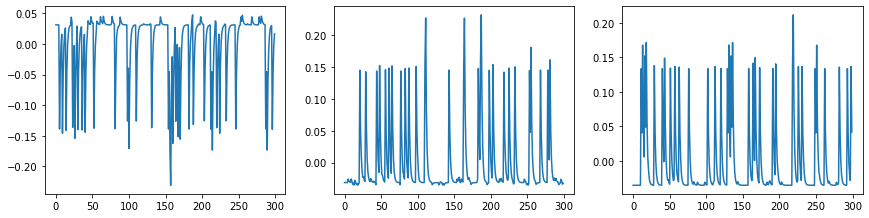

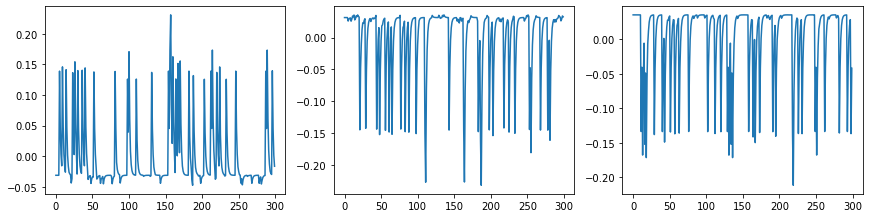

In [5]:
fig1 = plt.figure(figsize = (25,20))
fig2 = plt.figure(figsize = (25,20))

for i in range(nr_components):
    ax1 = fig1.add_subplot(5,5,i+1)
    ax1.plot(S[:,i])
    ax2 = fig2.add_subplot(5,5,i+1)
    ax2.plot(-S[:,i])

(2500, 3) 255.0 0.0
(3, 300)


Text(0.5, 0, 'Sample')

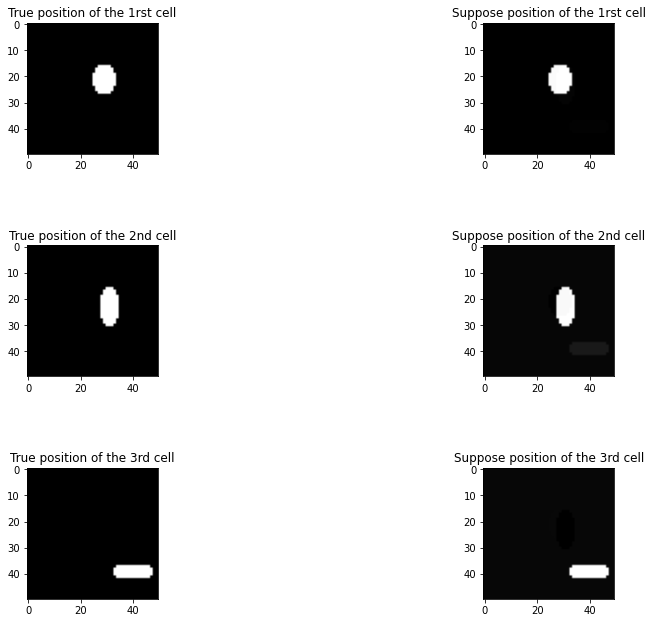

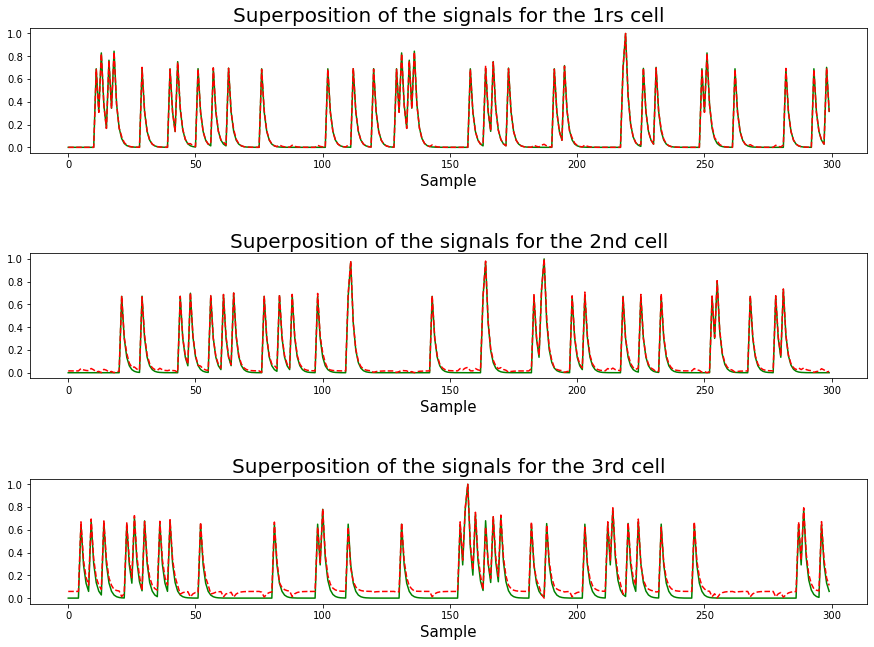

In [7]:
a = A[:,2]
b = A[:,1]
c = -A[:,0]

a_ = S[:,2]
b_ = S[:,1]
c_ = -S[:,0]

D_test = np.array([ (a - np.min(a))/np.max(a-np.min(a))*255,(b-np.min(b))/np.max(b-np.min(b))*255,(c-np.min(c))/np.max(c-np.min(c))*255])
D_test = D_test.T
print(D_test.shape, np.max(D_test), np.min(D_test))

A_test = np.array([(a_-np.min(a_))/np.max((a_-np.min(a_))), (b_-np.min(b_))/np.max((b_-np.min(b_))),(c_-np.min(c_))/np.max((c_-np.min(c_)))])
print(A_test.shape)

fig, ax = plt.subplots(3,2, figsize=(15, 10))
plt.gcf().subplots_adjust(left = 0.125, bottom = 0.1, right = 0.9, top = 0.9, wspace = 0.2, hspace = 0.7) 

ax[0][0].imshow(D_true[:,0].reshape((50,50)), cmap='gray', vmin=0, vmax=255)
ax[0][0].set_title('True position of the 1rst cell')
ax[0][1].imshow(D_test[:,0].reshape(50,50), cmap = 'gray')
ax[0][1].set_title('Suppose position of the 1rst cell')

ax[1][0].imshow(D_true[:,1].reshape((50,50)), cmap='gray', vmin=0, vmax=255)
ax[1][0].set_title('True position of the 2nd cell')
ax[1][1].imshow(D_test[:,1].reshape(50,50), cmap = 'gray')
ax[1][1].set_title('Suppose position of the 2nd cell')

ax[2][0].imshow(D_true[:,2].reshape((50,50)), cmap='gray', vmin=0, vmax=255)
ax[2][0].set_title('True position of the 3rd cell')
ax[2][1].imshow(D_test[:,2].reshape(50,50), cmap = 'gray')
ax[2][1].set_title('Suppose position of the 3rd cell')


fig, ax = plt.subplots(3,1, figsize=(15, 10))
plt.gcf().subplots_adjust(left = 0.125, bottom = 0.1, right = 0.9, top = 0.9, wspace = 0.2, hspace = 0.8) 

ax[0].plot(np.arange(0,300,1), A_true[0,:].T, 'g')
ax[0].plot(np.arange(0,300,1),  A_test[0,:].T, 'r--')
ax[0].set_title('Superposition of the signals for the 1rs cell', fontsize = 20)
ax[0].set_xlabel('Sample', fontsize = 15)

ax[1].plot(np.arange(0,300,1), A_true[1,:].T, 'g')
ax[1].plot(np.arange(0,300,1), A_test[1,:].T, 'r--')
ax[1].set_title('Superposition of the signals for the 2nd cell', fontsize=20)
ax[1].set_xlabel('Sample', fontsize = 15)

ax[2].plot(np.arange(0,300,1), A_true[2,:].T, 'g')
ax[2].plot(np.arange(0,300,1), A_test[2,:].T, 'r--')
ax[2].set_title('Superposition of the signals for the 3rd cell', fontsize=20)
ax[2].set_xlabel('Sample', fontsize = 15)



In [8]:
min_A = 1
min_D = 1

mean_A = 0
mean_D = 0
for i in range(3):
    j = abs(np.corrcoef(A_true[i,:], A_test[i,:])[0][1])
    if np.isnan(j):
        j = 0
    print('corr A' + str(i), j)
    if j<min_A:
        min_A = j
    mean_A = mean_A + j
    
    j = abs(np.corrcoef(D_true[:,i], D_test[:,i])[0][1])
    if np.isnan(j):
        j = 0
    print('corr D' + str(i), j)
    if j < min_D:
        min_D = j
    mean_D = mean_D + j
    
    
print('min corr A ', min_A)
print('min corr D', min_D)
print('mean A corr', mean_A/3)
print('mean D corr', mean_D/3)

corr A0 0.9996859945509438
corr D0 0.9998320962213805
corr A1 0.9992720976082895
corr D1 0.9974886929405501
corr A2 0.9972247152782262
corr D2 0.9993740611891514
min corr A  0.9972247152782262
min corr D 0.9974886929405501
mean A corr 0.998727602479153
mean D corr 0.9988982834503607
